#Project 1 - Predict the class of iris plant




##Business Understanding

This is perhaps the best known database to be found in the pattern recognition  literature. Fisher's paper is a classic in the field and is referenced frequently to this day. The  data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are NOT linearly separable from each  other.



#Attribute Information:

1. Sepal length
2. Sepal width
3. Petal length
4. Petal width
5. Variety of plant

#Table of content
* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Exploratory Data Analysis__
    
* __Step 4: Feature selection__
   
* __Step 5: Feature engineering__
   
* __Step 6: Train and Test split__
   
* __Step 7: Model training__
   
* __Step 8: Hyperparameter Tuning__

* __Step 9: Conclusion & Observation__

#Goal of the Project:

The goal of this project is to create a model that can determine which variant belongs to which species. This was accomplished through the use of Machine Learning Classification concepts as well as data visualisation techniques. Scikit-Learn, Pandas, and Data Visualisation Libraries are used in the project.

#Importing the libraries

In [1]:
pip install scikit-optimize

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
import time
from math import sqrt
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from skopt.space import Real, Categorical, Integer

#Load the Dataset


In [3]:
df = df = pd.read_csv('iris.csv')

#Data Inspection

In [4]:
#Copying the dataset
data = df.copy()

In [5]:
#Showing first 5 rows
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Head() funtion is used to retrieve first 5 rows of the data.

In [6]:
#Showing Last 5 rows
data.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


tail() is used to retrieve last 5 rows of the data.

In [7]:
#Finding the size of the dataset
data.shape

(150, 5)

Dataset has 150 rows and 5 columns.

###Display the complete summary of the dataset

df.info() gives the summary of the dataframe including data types, shape and memory storage.

In [8]:
#Check datatype and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Observation-

The dataset has 2 different dtype kinds. They are object and float. There is 1 categorical feature and the rest are numerical.

###Checking the Null Values

The isnull() function returns a specified value if the expression is NULL. If the expression is NOT NULL, this function returns the expression.

In [9]:
# Checking for NUll Values
data.isna().sum().to_frame().rename(columns={0:'Missing Value '})

,Missing Value
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
variety,0


No null values found in this dataset.

###Checking Unique Values

The nunique() method returns the number of unique values for each column.

In [10]:
#checking unique values of each features
data.nunique()

sepal.length    35
sepal.width     23
petal.length    43
petal.width     22
variety          3
dtype: int64

###Checking Duplicates in the dataset

In [11]:
#Finding Duplicate values
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

No duplicates found

###Descriptive Statistics

Checking the statistics of our data like mean, standard deviation and so on..
To learn more about the dataset features, w e're using the df.describe() function, which provides statistical data on all numerical features of our data frame by default.

In [12]:
data.describe(include='all')

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


From this description, we can see all the descriptions about the data, like average length and width, minimum value, maximum value, the 25%, 50%, and 75% distribution value, etc.

###Categorical features statistics details


The following argument will help us to mention categorical columns and will also show a summary of all the categorical features.

In [13]:
data.describe(include='O')

,variety
count,150
unique,3
top,Setosa
freq,50


Observation -

In our dataset, there are 3 unique variety of kinds.
Most kind of variety is 'Setosa'

#Exploratory Data Analysis

###Assigning target column to a variable

In [14]:
#Storing target column into a variable
Dependent_variable = data['variety']

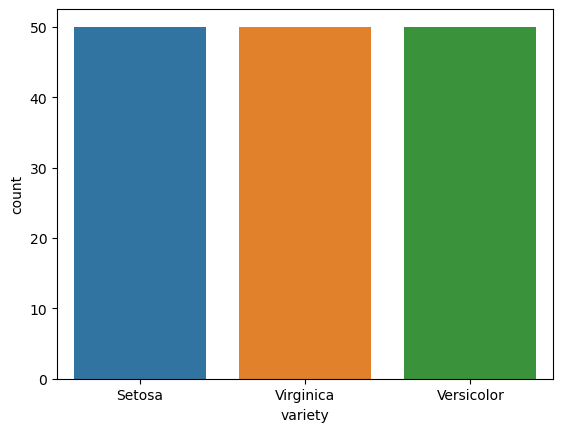

In [15]:
sns.countplot(x='variety', data=data, order=['Setosa', 'Virginica', 'Versicolor'])
# Show the plot
plt.show()

Observation -

As we can see, our data is equally balanced.

In [16]:
data.variety.value_counts()/data.shape[0]

Setosa        0.333333
Versicolor    0.333333
Virginica     0.333333
Name: variety, dtype: float64

###Relationship between each variable

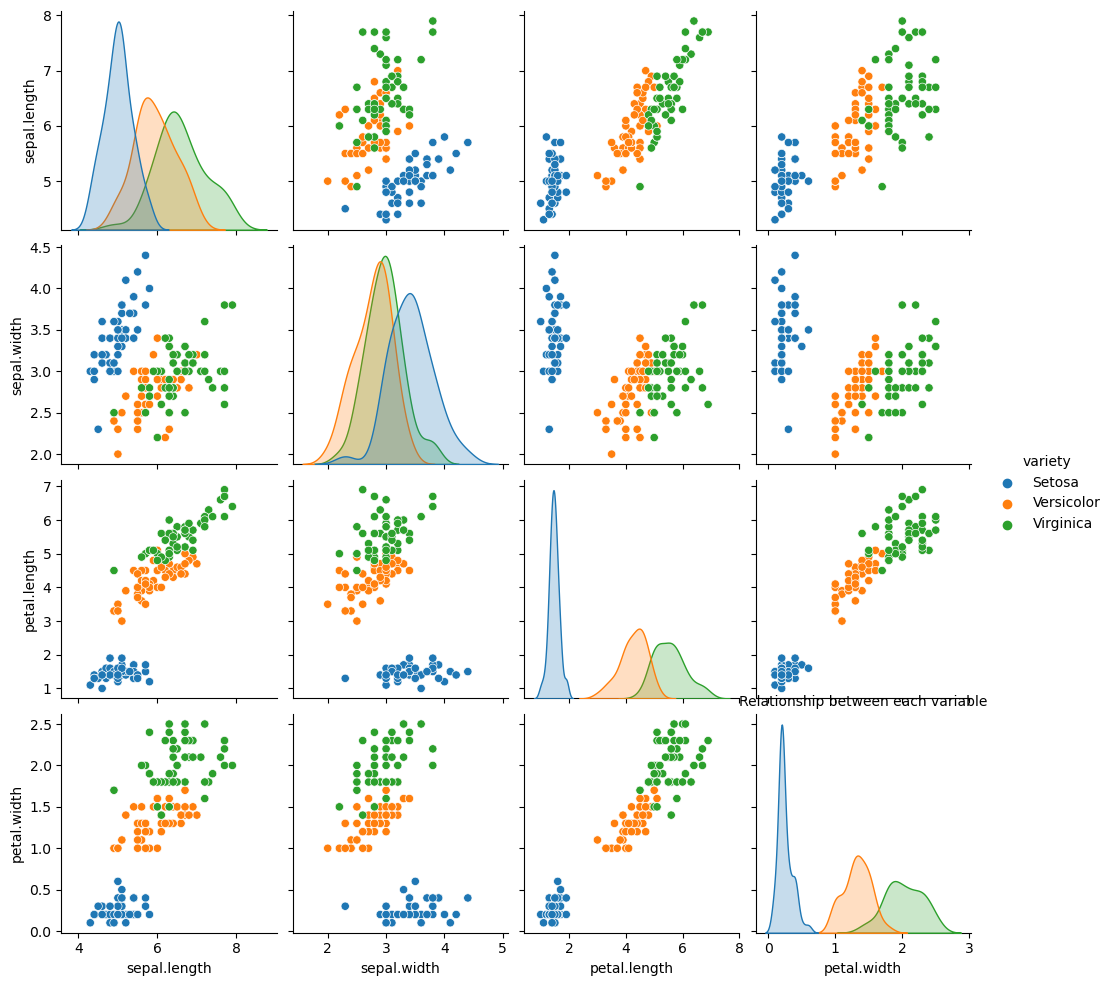

In [17]:
sns.pairplot(data=data, hue='variety')
plt.title('Relationship between each variable', fontsize=10)

# Show the plot
plt.show()

From this visualization, we can say that Setosa is well separated from the other two flowers and Virginica is the longest flower and Iris setosa is the shortest.

###Checking Outliers

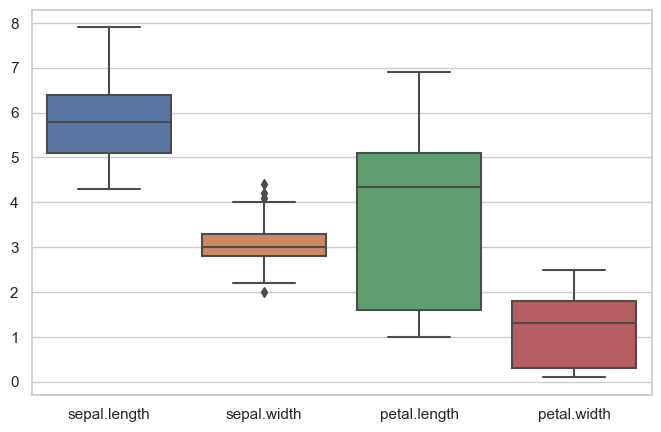

In [18]:
# Assuming 'data' is your DataFrame
sns.set(style="whitegrid")  # Set the style of the plot

# Create box plots for each column in the DataFrame
plt.figure(figsize=(8, 5))  # Set the figure size (optional)
sns.boxplot(data=data)

# Show the plot
plt.show()

Other than the target variable, we found only one column with more outliers after analysing all of the features- Sepal.width'.

###Checking outliers using IQR Method

In [19]:
#Checking Outliers using IQR Method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

((data<(Q1 - 1.5*IQR)) | (data>(Q3 + 1.5*IQR))).sum()

C:\Users\User\AppData\Local\Temp\ipykernel_13256\1886061541.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\User\AppData\Local\Temp\ipykernel_13256\1886061541.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\User\AppData\Local\Temp\ipykernel_13256\1886061541.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data<(Q1 - 1.5*IQR)) | (data>(Q3 + 1.5*IQR))).sum()


petal.length    0
petal.width     0
sepal.length    0
sepal.width     4
variety         0
dtype: int64

Found Outliers in Sepal.width feature.

###Now once again visualizing outliers using box plot

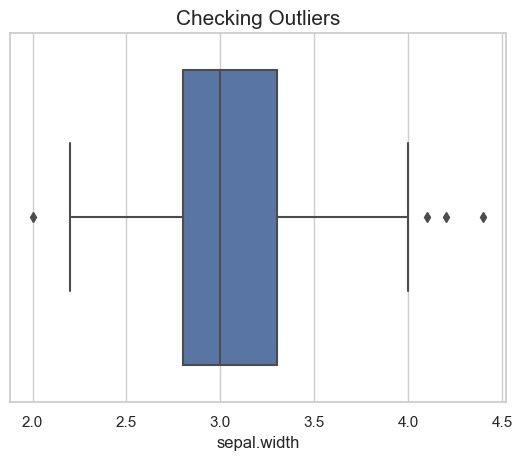

In [20]:
##Checking Outliers
sns.boxplot(x=data['sepal.width'])
plt.title('Checking Outliers', size=15)#title for the countplot
plt.show()

#Data Engineering

##Coverting Categorical columns into Numerical columns using Encoding techniques

In [21]:
from sklearn import preprocessing
from sklearn. preprocessing import LabelEncoder
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
data['variety'] = labelEncoder.fit_transform(data['variety'])

In [22]:
data['variety'].dtype

dtype('int32')

Observation -

We can see that all columns have been numerically converted.

###Seperating Dependent and Independent Variables

In [23]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [24]:
independent = data.drop(['variety'], axis=1) #Contain all independent variables
dependent = data['variety'] #Contain Dependent variable

In [25]:
#Finding scores of each feature
f_scores = f_classif(independent, dependent)
f_scores

(array([ 119.26450218,   49.16004009, 1180.16118225,  960.0071468 ]),
 array([1.66966919e-31, 4.49201713e-17, 2.85677661e-91, 4.16944584e-85]))

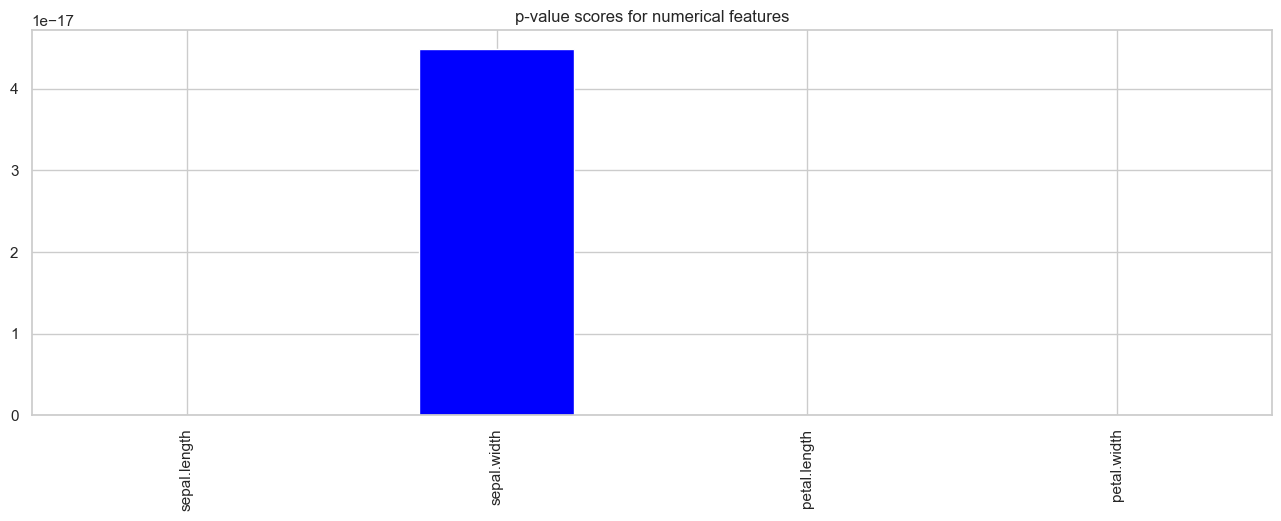

In [26]:
#The Second array consists of p-values that we need.
p_values = pd.Series(f_scores[1], index= independent.columns)
p_values.plot(kind='bar', color='blue', figsize=(16,5))
plt.title('p-value scores for numerical features')
plt.show()

###Correlation Feature Selection

Text(0.5, 1.05, 'Pearson correlation of Features')

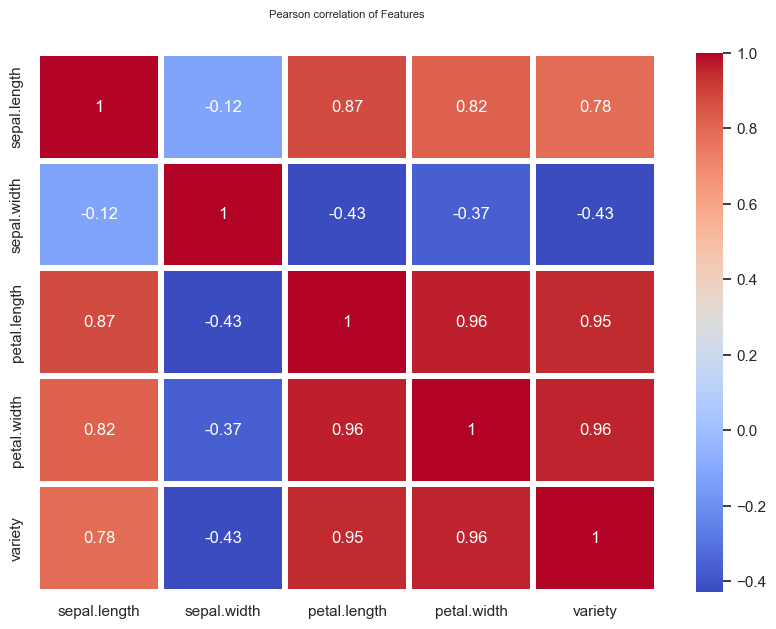

In [27]:
#Checking correlation of all the columns using heatmap
plt.figure(figsize = (10,7))
correlation = data.corr()
sns.heatmap(correlation, annot= True,linewidths=3,cmap='coolwarm')
plt.title("Pearson correlation of Features", y=1.05, size=8)

Sepal Width is negetively correlated so we can drop Sepal Width column

#Data Modelling

##Split Train & Test data

#Model Training

In [28]:
from sklearn.preprocessing import LabelEncoder
# Encode the target variable to numeric
label_encoder = LabelEncoder()
data['variety'] = label_encoder.fit_transform(data['variety'])

In [29]:
# Define the ratios for training, validation, and test data
ratio_60_20_20 = [0.6, 0.2, 0.2]  # 60% training, 20% validation, 20% test
ratio_80_10_10 = [0.8, 0.1, 0.1]  # 80% training, 10% validation, 10% test

# Split the data into features (X) and target variable (y)
X = data.drop('variety', axis=1)
y = data['variety']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC as SVM
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Starting the timer
    start_time = time.time()

    # Training the model
    model.fit(X_train, y_train)

    # Calculating training latency
    end_time_train = time.time()
    latency_train = end_time_train - start_time

    # Predicting on validation set
    y_pred_val = model.predict(X_val)

    # Calculating evaluation metrics on validation set
    precision_val = precision_score(y_val, y_pred_val, average='weighted')
    recall_val = recall_score(y_val, y_pred_val, average='weighted')
    accuracy_val = accuracy_score(y_val, y_pred_val)

    # Prediction on test set
    y_pred_test = model.predict(X_test)

    # Calculating evaluation metrics on test set
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    accuracy_test = accuracy_score(y_test, y_pred_test)

    # Calculating total latency (including training)
    end_time = time.time()
    latency_total = end_time - start_time

    return precision_val, recall_val, accuracy_val, precision_test, recall_test, accuracy_test, latency_train, latency_total



Let's try these 3 algorithms.

In [31]:
# Defining the models and their parameter grids for Grid Search
models = {
    'LR': (LR(solver='lbfgs', max_iter=1000), {'C': [0.1, 1, 10]}),
    'SVM': (SVM(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'RF': (RF(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]})
}

##Below,I have conducted experiments with different data split ratios, dividing the data into training, validation, and test sets and used K-Fold cross-validation to assess model performance. For each model, we fine-tuned hyperparameters through grid search and save results like precision, recall, accuracy, and latency. Finally, we compared each model performance across different split ratios.

In [32]:

# Perform experiments on two different ratios of data split
for ratios in [ratio_60_20_20, ratio_80_10_10]:
    print("\nSplit Ratios:", ratios)
    kf = KFold(n_splits=5, shuffle=True, random_state=101)

    # Split the data into training, validation, and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=ratios[2], random_state=101)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=ratios[1] / (ratios[0] + ratios[1]), random_state=42)

    # Print the K-Fold cross-validation scores
    print("\nK-Fold Cross-Validation Scores:")
    for model_name, (model, param_grid) in models.items():
        print("\nModel:", model_name)
        scores = cross_val_score(model, X_train_val, y_train_val, cv=kf)
        print("Scores:", scores)
        print("Mean Score:", np.mean(scores))

    # Evaluate the models
    results = []
    for model_name, (model, param_grid) in models.items():
        print("\nModel:", model_name)

        # Perform Grid Search to find optimal hyperparameters
        grid_search = GridSearchCV(model, param_grid, cv=kf)
        grid_search.fit(X_train_val, y_train_val)
        best_model = grid_search.best_estimator_

        # Evaluate the model on validation and test sets with latency measurement
        precision_val, recall_val, accuracy_val, precision_test, recall_test, accuracy_test, latency_train, latency_total = evaluate_model(best_model, X_train, y_train, X_val, y_val, X_test, y_test)

        results.append({
            'Model': model_name,
            'Precision (Validation)': precision_val,
            'Recall (Validation)': recall_val,
            'Accuracy (Validation)': accuracy_val,
            'Precision (Test)': precision_test,
            'Recall (Test)': recall_test,
            'Accuracy (Test)': accuracy_test,
            'Latency (Training)': latency_train,
            'Latency (Total)': latency_total
        })

    # Display the results for the split ratios
    results_df = pd.DataFrame(results)
    print("\nResults for Split Ratios:", ratios)
    print(results_df)

    # Compare the performance of models
    print("\nPerformance Comparison:")
    for model_name in results_df['Model']:
        model_results = results_df.loc[results_df['Model'] == model_name]
        print("\nModel:", model_name)
        print("Best Precision (Validation):", model_results['Precision (Validation)'].max())
        print("Best Recall (Validation):", model_results['Recall (Validation)'].max())
        print("Best Accuracy (Validation):", model_results['Accuracy (Validation)'].max())
        print("Best Precision (Test):", model_results['Precision (Test)'].max())
        print("Best Recall (Test):", model_results['Recall (Test)'].max())
        print("Best Accuracy (Test):", model_results['Accuracy (Test)'].max())
        print("Average Latency (Training):", model_results['Latency (Training)'].mean())
        print("Average Latency (Total):", model_results['Latency (Total)'].mean())


Split Ratios: [0.6, 0.2, 0.2]

K-Fold Cross-Validation Scores:

Model: LR
Scores: [0.83333333 1.         0.91666667 1.         1.        ]
Mean Score: 0.95

Model: SVM
Scores: [0.83333333 0.95833333 0.91666667 1.         1.        ]
Mean Score: 0.9416666666666668

Model: RF
Scores: [0.83333333 1.         0.91666667 1.         1.        ]
Mean Score: 0.95

Model: LR

Model: SVM

Model: RF

Results for Split Ratios: [0.6, 0.2, 0.2]
  Model  Precision (Validation)  Recall (Validation)  Accuracy (Validation)  \
0    LR                1.000000             1.000000               1.000000   
1   SVM                0.970833             0.966667               0.966667   
2    RF                1.000000             1.000000               1.000000   

   Precision (Test)  Recall (Test)  Accuracy (Test)  Latency (Training)  \
0               1.0            1.0              1.0            0.033491   
1               1.0            1.0              1.0            0.000000   
2               1.0    

Conclusion:


The Iris dataset is well-known for its use in classification, machine learning, and data visualisation.

The dataset includes three classes (various Iris species), each with 50 samples, and four numerical parameters regarding those classes: sepal length, sepal width, petal length, and petal width.

Iris Setosa is "linearly separable" from the other two species. This indicates that we can draw a line (or, in higher-dimensional spaces, a hyperplane) between Iris Setosa samples and samples from the other two species.



Observation:

LR achieves the highest precision, recall, and accuracy scores on both the validation and test sets. It also maintains relatively low average training and total latency. Therefore, Logistic Regression consistently performs the best across different data split ratios.

Finding best split ratio:

Based on the provided results, the split ratio 80-10-10 consistently leads to better model performance compared to the split ratio 60-20-20. In both cases, the same model, Logistic Regression (LR), achieved the highest precision, recall, and accuracy scores on both the validation and test sets.

Therefore, the split ratio 80-10-10 appears to be the better choice when comparing these two ratios for this specific dataset and models. It consistently resulted in superior model performance.